In [18]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

In [21]:
# Follow this link : https://www.slideshare.net/SuddhasheelGhosh/point-collocation-method-used-in-the-solving-of-differential-equations-particularly-in-finite-element-methods
# for the theory behind the point collocation method


class PCM:

  def __init__(self, x, f, exact_solution):
    self.x = x    # Nodal points in mesh
    self.M = len(x)   # Length of mesh
    self.f = f    # f(x) function
    self.exact_sol = exact_solution   # Exact solution of the differential equation



  # Gauss elimination
  def gauss_elimination(self, A, F):
    n = len(F) #n is matrix size

    #Elimination phase
    for k in range(0,n-1): #k is matrix row
        for i in range(k+1,n): #i is matrix col
                  if A[i,k] != 0.0:
                    factor = A[i,k]/A[k,k]
                    A[i,k+1:n] = A[i,k+1:n] - np.multiply(factor,A[k,k+1:n])
                    F[i] = F[i] - np.multiply(factor,F[k])

    #Back substitution
    for k in range(n-1,-1,-1):
          F[k] = (F[k] - np.dot(A[k,k+1:n],F[k+1:n]))/A[k,k]

    return F

  # Coefficient matrix
  def coefficient_matrix(self, px, qx, y0, ye):
    # Assuming that boundary conditions are in the form y(x0) = y0, y(xe) = ye
    # P(x) and Q(x) are constants

    A = np.zeros((self.M, self.M), dtype = np.float32)
    F = np.zeros(self.M, dtype = np.float32)

    for i in range(self.M):
      for j in range(self.M):

        # Global matrix calculations
        if i == 0 or i == self.M-1:
          A[i][j] = math.pow(self.x[i], j)
        else:
          A[i][j] = (j*(j - 1)*math.pow(self.x[i], j-2)) + (px*(j*math.pow(self.x[i], j-1))) + (qx*(math.pow(self.x[i], j)))

      # Load vector calculations
      if i == 0:
        F[i] = y0
      elif i == self.M-1:
        F[i] = ye
      else:
        F[i] = self.f.subs(x, self.x[i])


    U = self.gauss_elimination(A, F)
    return A, F, U



  # Plot exact solution and PCM solution at xps points
  def plot_functions(self, u_exact, u_pcm, xps):
    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle('u(x) is blue u_pcm(x) is red')

    axs[0].plot(xps, u_exact)   # Exact solution 

    axs[1].plot(xps, u_pcm, 'tab:red')    # Approximate solution

    axs[2].plot(xps, u_exact, label="exact")
    axs[2].plot(xps, u_pcm, 'tab:red', label="approx")



  # Compare exact solution and PCM solution
  def compare_solutions(self, xps, U):
    u_exact = []    # Array to store exact solutions at nodal points 'xps'
    u_pcm = []      # Array to store approximation solutions at nodal points 'xps'
    error_arr = []
    x = sp.Symbol("x")

    for i in range(len(xps)):
      u_exact.append(self.exact_sol.subs(x, xps[i]))
      u_pcm.append(self.pcm_solution(xps[i], U))
      error_arr.append(u_pcm[i] - u_exact[i])

    error = np.linalg.norm(error_arr, np.inf)
        
    return u_exact, u_pcm, error



  # Point collocation method
  def pcm_solution(self, xp, U):
    px = 0    # px is the approximate solution
    for i in range(self.M):
      px += (U[i]*math.pow(xp, i))
    return px

  

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -1.00000001e-01  1.99000001e+00  5.98999977e-01
   1.19900003e-01  1.99900009e-02  2.99900002e-03  4.19899996e-04
   5.59900000e-05  7.19899981e-06  8.99899987e-07]
 [-1.00000000e+00 -2.00000003e-01 -2.01999998e+00 -5.99992275e-03
   2.38599986e-01  1.19699992e-01  4.19379994e-02  1.25874002e-02
   3.46946018e-03  9.06689966e-04  2.28497811e-04]
 [-1.00000000e+00 -3.00000012e-01 -4.06000042e+00 -1.19406767e-02
   2.32637554e-01  2.37014845e-01  1.48982763e-01  7.52821714e-02
   3.36171463e-02  1.38827628e-02  5.43703744e-03]
 [-1.00000000e+00 -4.00000006e-01 -6.11999989e+00 -4.18219566e-02
  -1.22895062e-01 -2.99465656e-03  1.03039443e-01  1.24951780e-01
   1.00241929e-01  6.63027912e-02  3.91385593e-02]
 [-1.00000000e+00 -5.00000000e-01 -8.19999981e+00 -9.56437662e-02
  -4.93980289e-01 -

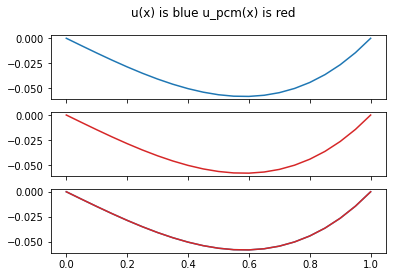

In [24]:
interval = [0,1]
h = 0.1
x_points = np.arange(interval[0], interval[1] + h, h)
#x_points = [0, 0.25, 0.5, 1]     # Initial x nodal points
x = sp.Symbol("x")
f = x    # f(x) function
exact_solution = -x + (sp.exp(x) / (2*math.sinh(1))) - (sp.exp(-x) / (2*math.sinh(1)))     # Exact solution


model = PCM(x_points, f, exact_solution)
A, F, U = model.coefficient_matrix(0, -1, 0, 0)


h = 0.05
xps = np.arange(interval[0], interval[1] + h, h)    # X nodal points for testing
exact, pcm, err = model.compare_solutions(xps, U)
print(f'Error: {err}')

model.plot_functions(exact, pcm, xps)   # Plot functions